In [ ]:
import numpy as np 
import pandas as pd
import glob
import mingus.core.chords as chords
import mingus.core.scales as scales
import mingus.core.notes as notes

In [ ]:
chords.triads('A')

In [ ]:
note_int_mapping = {0:'C', 1:'Db', 2:'D', 3:'Eb',
                   4:'E', 5:'F', 6:'Gb', 7:'G', 
                   8:'Ab', 9:'A', 10:'Bb', 11:'B'}
revers_mapping = {v:k for k,v in note_int_mapping.items()}
EQUIVALENTS = 

In [ ]:
templates = np.zeros((24, 12))
chords.major_triad("C")

In [ ]:
chords.minor_triad("C")

In [ ]:
scales.get_notes("A")

In [ ]:
scales.get_notes("Ab")

In [ ]:
# first 12 rows are major triads
## next 12 rows are minor triads
templates = np.zeros((24, 12))

In [ ]:
import itertools
EQUIVALENT = {'C#':'Db', 'Db':'C#',
             'D#':'Eb', 'Eb':'D#',
              'E#':'F', 'F':'E#',
              'Fb':'E','E':'Fb',
             'F#':'Gb', 'Gb':'F#',
             'G#':'Ab', 'Ab':'G#',
             'A#':'Bb', 'Bb':'A#',
             'B':'Cb','Cb':'B'}
def find_equivalent(note):
    return EQUIVALENT[note]

for i, triad in enumerate(list(map(chords.major_triad, revers_mapping.keys()))):
    for note in triad:
        note_active = note
        if note not in revers_mapping.keys():
            note_active = find_equivalent(note)
        templates[i, revers_mapping[note_active]] = 1
for i, triad in enumerate(list(map(chords.minor_triad, revers_mapping.keys()))):
    for note in triad:
        note_active = note
        if note not in revers_mapping.keys():
            note_active = find_equivalent(note)
        templates[i+12, revers_mapping[note_active]] = 1
print(templates)

In [ ]:
chords.major_triad("A")

In [ ]:
chords.minor_triad("A")

In [ ]:
notes.remove_redundant_accidentals('Bbb')

In [ ]:
chord_files = glob.glob('Datasets/The Beatles Annotations/chordlab/**/**/*.lab',\
                        recursive = True)

In [ ]:
# df =pd.DataFrame(columns =['file', 'Chords'])
# for file_no, file in enumerate(chord_files):
#     chords = []
#     with open(file, 'r') as f:
#         lines = f.readlines()
#         for line in lines:
#             chords.append(line.split(' ')[2])
#     df = df.append({'file':file, 'chords':" ".join(chords)}, ignore_index = True)
    

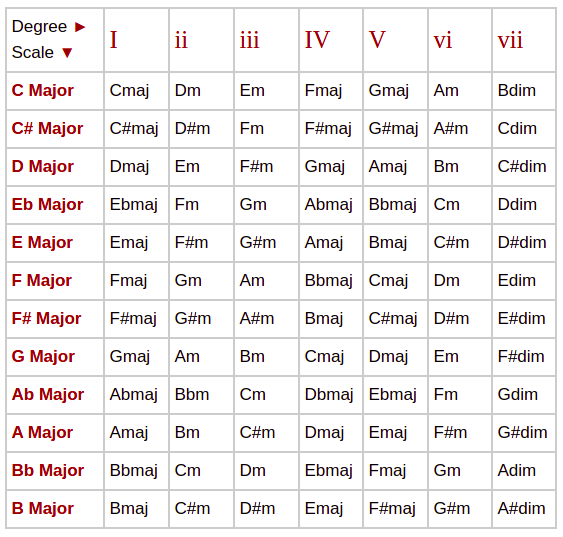
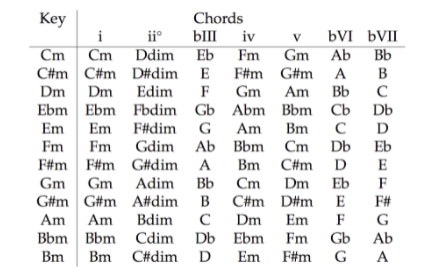

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from scipy.spatial import distance
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn.base import BaseHMM
from hmmlearn import hmm

In [ ]:
df = pd.read_csv('Jupyter notebooks/beatles_chords.csv')

In [ ]:
%%time
def get_pitch_and_quality(chord1):
    if ":" in chord1:
        pattern1 = re.compile("([C|D|E|F|G|A|B][b|#]?)[/1-9]*:(minmaj7|maj|min|dim|aug|maj7|min7|7\
    |dim7|hdim7|maj6|min6|9|7|\
    |maj9|min9|sus2|sus4)")
        result = pattern1.search(chord1)
        if result is None:
            return '<unk>','<unk>'
        pitch1 = result.group(1)
        
        if "min" in result.group(2):
            quality1 = "min"
        elif "maj" in result.group(2):
            quality1 = "maj"
        elif result.group(2) == "7" or result.group(2) == "9":
            quality1 = "maj"
        else:
            quality1 = result.group(2)
        
    else:
        pattern1 = re.compile("([C|D|E|F|G|A|B|N][b|#]?)[/1-9]*")
        result = pattern1.search(chord1)
        pitch1, quality1 = result.group(1), "maj"
        
    
    return (pitch1, quality1)

vocab = dict()
vocab_count = 0
trans_prob = dict()
init_prob = dict()
docs = df.Chords.values
for doc in docs:
    chord_sequence = doc.split(' ')
    init_chord = "".join(get_pitch_and_quality(chord_sequence[0]))
    if init_chord not in init_prob.keys():
        init_prob[init_chord] = 1
    else:
        init_prob[init_chord]+= 1
    for i in range(len(chord_sequence)-1):
        chord1 = "".join(get_pitch_and_quality(chord_sequence[i]))
        
        chord2 = "".join(get_pitch_and_quality(chord_sequence[i+1]))
#         print(chord1)
#         print(chord2)
        if chord1 not in trans_prob.keys():
            trans_prob[chord1] = dict()
        if chord2 not in trans_prob[chord1].keys():
            trans_prob[chord1][chord2] = 0
        trans_prob[chord1][chord2] += 1
        if chord1 not in vocab.keys():
            vocab[chord1] = vocab_count
            vocab_count += 1


In [ ]:
%%time
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id="ce51654ad78d4d8e95fc997b46709213",
                                                           client_secret="b3897f893de84b6890212df2c8f7c176"))

note_int_mapping = {0:'C',1:'C#', 2:'D', 3:'D#', 4:'E', 5:'F', 6:'F#',\
                    7:'G', 8:'G#', 9:'A', 10:'Bb',11:'B'}
A_mapping = \
{'Amaj':[0, .5, 0, 0, .5, 0, 0, 0, 0, 1, 0, 0], 
'Bmin':[0, 0, .5, 0, 0, 0, .5, 0, 0, 0, 0, 1],
'C#min':[0, 1, 0, 0, .5, 0, 0, 0, .5, 0, 0, 0],
'Dmaj':[0, 0, 1, 0, 0, 0, .5, 0, 0, .5, 0, 0],
'Emaj':[0, 0, 0, 0, 1, 0, 0, 0, .5, 0, 0, .5],
'F#min':[0, 0.5, 0, 0, 0, 0, 1, 0, 0, .5, 0, 0],
'G#dim':[0, 0, .5, 0, 0, 0, 0, 1, 0, 0, 0, .5]}
Bb_mapping = \
{'Bbmaj':[0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0], 
'Cmin':[0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1],
'Ebmin':[0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
'Emaj':[0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0],
'Fmaj':[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1],
'Gmin':[0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
'Amaj':[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1]}

C_mapping = \
{'Cmaj':[1, 0, 0, 0, 0.5, 0, 0, 0.5, 0, 0, 0, 0], 
'Dmin':[0, 0, 1, 0, 0, .5, 0, 0, 0, .5, 0, 0],
'Emin':[0, 0, 0, 0, 1, 0, 0, .5, 0, 0, 0, .5],
'Fmaj':[.5, 0, 0, 0, 0, 1, 0, 0, 0, .5, 0, 0],
'Gmaj':[0, 0, .5, 0, 0, 0, 0, 1, 0, 0, 0, .5],
'Amin':[.5, 0, 0, 0, .5, 0, 0, 0, 0, 1, 0, 0],
'Bdim':[0, 0, .5, 0, 0, .5, 0, 0, 0, 0, 0, 1]}
F_mapping = \
{'Fmaj':[.5, 0, 0, 0, 0, 1, 0, 0, 0, .5, 0, 0], 
'Gmin': [0, .5, 0, 0, 0, 0, 0, 1, 0, 0, .5, 0],
'Amin': [0.5, 0, 0, 0, .5, 0, 0, 0, 0, 1, 0, 0],
'Bbmaj':[0, 0, 0.5, 0, 0, .5, 0, 0, 0, 0, 1, 0],
'Cmaj': [1, 0, 0, 0, .5, 0, 0, .5, 0, 0, 0, 0],
'Dmin':[0, 0, 1, 0, 0, 0, .5, 0, 0, .5, 0, 0],
'Edim':[0, 0, 0, 0, 1, 0, 0, .5, 0, 0, .5, 0]}
key_chord_mapping = {'Cmaj':C_mapping, 'Amaj':A_mapping, 'Bbmaj':Bb_mapping, 'Fmaj':F_mapping}
results = sp.search(q='buffalo soldier bob marley', limit=1)
tracks = results['tracks']['items']
for idx, track in enumerate(results['tracks']['items']):
    print('{}:{} {}'.format(idx, track['id'], track['name']))

results  = sp.audio_analysis(tracks[0]['id'])

key = results['track']['key']
if results['track']['mode'] == 0:
    mode = 'min'
else:
    mode = 'maj'
scale = note_int_mapping[results['track']['key']]+mode
print('scale is {}'.format(scale))
print('duration of this track is {}'.format(results['track']['duration'])) 
chord_mapping = key_chord_mapping[scale]
for name, chord in chord_mapping.items():
    print('{} : {}'.format(name, chord))
segments = results['segments']
init_pitches = []
features = np.zeros((len(segments),12))
for i, segment in enumerate(segments):
    features[i, :] = segment['pitches']
#     for chord, template in chord_mapping.items():
#         emission_prob[i, vocab[chord]] =1 / distance.cosine(template, segment['pitches'])
#         print('{}:{}'.format(chord, round(emission_prob[i, vocab[chord]], 2)),\
#               end = '\t')
#     print('\n')
#     indx = np.argmin(emission_prob[i])
#     init_pitches.append(indx)

In [ ]:
features.shape

In [ ]:
vocab.keys()

In [ ]:
trans_prob['Nmaj']

In [ ]:
chord_mapping.keys()

In [ ]:
vocab_keys = list(vocab.keys())
for k in vocab_keys:
    if k not in chord_mapping.keys() and k != "Nmaj":
        vocab.pop(k, None)

In [ ]:
for i, k in enumerate(vocab.keys()):
    vocab[k] = i

In [ ]:
init_prob_keys = list(init_prob.keys())
for k in init_prob_keys:
    if k not in vocab.keys():
        init_prob.pop(k, None)

In [ ]:
trans_prob_keys = list(trans_prob.keys())
for k1 in trans_prob_keys:
    trans_prob_inner_keys = list(trans_prob[k1].keys())
    for k2 in trans_prob_inner_keys:
        if k2 not in vocab.keys():
            trans_prob[k1].pop(k2, None)
    if k1 not in vocab.keys():
        trans_prob.pop(k1, None)


In [ ]:
vocab

In [ ]:
init_prob

In [ ]:
for k in trans_prob.keys():
    print('{} : {} {}'.format(k, list(trans_prob[k].keys()), list(trans_prob[k].values())))

In [ ]:
for k in chord_mapping.keys():
    print(k in vocab)

In [ ]:
trans_mat = np.zeros((len(vocab.keys()), len(vocab.keys())))
for k1 in trans_prob.keys():
    for k2 in trans_prob[k1].keys():
        idx1 = vocab[k1]
        idx2 = vocab[k2]
        trans_mat[idx1, idx2] = trans_prob[k1][k2]
trans_mat = trans_mat / trans_mat.sum(axis=1)[:, np.newaxis]

In [ ]:
init_mat = np.zeros((len(vocab)))
for k in init_prob.keys():
    print(k)
    idx = vocab[k]
    init_mat[idx] = init_prob[k]
init_mat = init_mat / init_mat.sum()

In [ ]:
print(sum(trans_mat[3]))
print(init_mat[0])

In [ ]:
emission_prob = np.zeros((features.shape[0] , len(vocab.keys())))

In [ ]:
for i in range(features.shape[0]):
    chroma = features[i, :]
    for k, template in chord_mapping.items():
        emission_prob[i, vocab[k]]= 1 - distance.euclidean(template, chroma)

In [ ]:
# for i in range(features.shape[0]):
#     top3_notes = np.argsort(features[i])[::-1][:3]
#     print(chords.determine_triad(list(map(notes.int_to_note, top3_notes)),\
#                                       shorthand = True))

In [ ]:
emission_prob[:, 0] = 0.2
emission_prob = emission_prob / emission_prob.sum(axis = 1)[:, np.newaxis]

In [ ]:
emission_prob = emission_prob.T

In [ ]:
sum(emission_prob[:, 0])

In [ ]:
# 2d matrix to hold delta values of (States, Observations)
delta = np.zeros(emission_prob.shape)
paths = np.ones(emission_prob.shape)*-1

In [ ]:
delta.shape

In [ ]:
len(paths[0])

In [ ]:
# initial delta values
for row in range(emission_prob.shape[0]):
    delta[row][0] = init_mat[row]*emission_prob[row][0]

In [ ]:
for col in range(1, emission_prob.shape[1]):
    normalized_col = sum([emission_prob[j][col] for j in range(emission_prob.shape[0])])
    for possible_chord in range(emission_prob.shape[0]):
        delta[possible_chord][col] = max([delta[j][col-1]*trans_mat[j][possible_chord]\
                                 for j in range(emission_prob.shape[0])])\
        *emission_prob[possible_chord][col]
        paths[possible_chord][col] = np.argmax([delta[j][col-1]*trans_mat[j][possible_chord]\
                                       for j in range(emission_prob.shape[0])])
    nomalized_delta = sum([delta[possible_chord][col] for possible_chord in range(len(delta))])
    for possible_chord in range(len(delta)):
        delta[possible_chord][col] = delta[possible_chord][col]/ nomalized_delta

final_path = np.argmax([delta[pos][emission_prob.shape[1]-1]\
                        for pos in range(emission_prob.shape[0])])
state_path = [final_path]
# backtracking to get the paths
for t in range(emission_prob.shape[1] - 1, 0, -1):
    state_path.append(paths[int(final_path)][t])
    final_path = state_path[-1]
chord_prog = state_path[::-1]

In [ ]:
reverse_mapping = {v:k for k, v in vocab.items()}
for i, segment in enumerate(segments):
    print('{} : {}-{}'.format(reverse_mapping[chord_prog[i]], segment['start'],\
                              segment['start']+segment['duration']))
# print([reverse_mapping[chord_prog[i]] for v in\
#        chord_prog])

col -> 1 - 1445


In [ ]:
emission_prob.shape

### Using hmmlearn

In [ ]:
model = hmm.MultinomialHMM(n_components=len(vocab.keys()))
model.startprob=init_mat
model.transmat=trans_mat
model.emissionprob=emission_prob

In [ ]:
np.argmax(emission_prob, axis = 1).shape

In [ ]:
model.fit(np.argmax(emission_prob, axis = 1).reshape(-1, 1))

In [ ]:
features

In [ ]:
reverse_mapping = {v:k for k, v in vocab.items()}
print([reverse_mapping[v] for v in\
       model.predict(np.argmax(emission_prob, axis = 1).reshape(-1, 1)\
                    )])

In [ ]:
reverse_mapping

In [ ]:
sum(emission_prob[0])

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer
# pattern = r"([C|D|E|F|G|A|B][b|#]?)[/1-9]*:minmaj7|maj|min|dim|aug|maj7|min7|7\
# |dim7|hdim7|maj6|min6|9\
# |maj9|min9|sus2|sus4"
# vect = CountVectorizer(ngram_range = (2,2), lowercase = False, token_pattern = pattern)
# transformed_doc = vect.fit_transform(df.Chords.values)

In [ ]:
transformed_doc.shape

In [ ]:
vect.vocabulary_

In [ ]:
import numpy as np
a = np.array([[1, 0.2, 0.4], [1, 1, 1]])

# row_sums = a.sum(axis=1)
a = a / a.sum(axis=1)[:, np.newaxis]
print(a)

In [ ]:
vocab

In [ ]:
idx = np.array(template).nonzero()
print(list(idx))

In [ ]:
chroma

#### Function transitions instead of chord
- roman numerals instead of chord names

In [1]:
import os
import glob
import numpy as np
import pandas
import librosa
import re

In [2]:
import pickle
dir_path = os.path.abspath('')
with open(dir_path+'/Datasets/Beat Synchronous Chroma Features  - All Beatles/beatchromlabs/\
beatchromlabs/beatles/With_The_Beatles/13-Not_A_Second_Time.pkl', 'rb') as f:
    data = pickle.load(f, encoding = 'latin1')

In [3]:
data[0].shape

(517,)

In [4]:
data[1].shape

(517, 12)

In [5]:
data[0]

array([  0.212,   0.452,   0.692,   0.932,   1.172,   1.412,   1.636,
         1.868,   2.1  ,   2.324,   2.564,   2.796,   3.02 ,   3.244,
         3.46 ,   3.684,   3.916,   4.156,   4.412,   4.652,   4.884,
         5.108,   5.34 ,   5.572,   5.812,   6.028,   6.268,   6.5  ,
         6.724,   6.956,   7.188,   7.42 ,   7.652,   7.868,   8.116,
         8.348,   8.572,   8.804,   9.044,   9.284,   9.524,   9.748,
         9.988,  10.228,  10.468,  10.7  ,  10.94 ,  11.172,  11.412,
        11.652,  11.9  ,  12.132,  12.356,  12.604,  12.828,  13.068,
        13.308,  13.532,  13.78 ,  14.02 ,  14.26 ,  14.484,  14.708,
        14.94 ,  15.196,  15.428,  15.668,  15.908,  16.132,  16.364,
        16.596,  16.828,  17.076,  17.308,  17.556,  17.796,  18.028,
        18.26 ,  18.5  ,  18.732,  18.972,  19.212,  19.444,  19.684,
        19.924,  20.164,  20.396,  20.628,  20.86 ,  21.092,  21.332,
        21.564,  21.796,  22.028,  22.268,  22.508,  22.764,  23.004,
        23.22 ,  23.

#### Reading the key from the files

In [6]:
key_files = glob.glob(dir_path+'/Datasets/The Beatles Annotations/keylab/\
The Beatles/**/*.lab',recursive = True)

In [7]:
%%time
## each file has a list of key at various time ranges
name_key_mapping = dict()
for name in key_files:
    f = open(name, 'r')
    file_nm = os.path.basename(name)
    print(file_nm)
    name_key_mapping[os.path.basename(name)] = [] 
    lines = f.readlines()
    for line in lines:
        print(line.split('\t'))
        if line.split('\t')[2] == 'Silence':
            continue
        elif line.split('\t')[2] == 'Key':
            start, end, key = line.split('\t')[0], line.split('\t')[1], line.split('\t')[3]
            name_key_mapping[os.path.basename(name)]\
            .append((start, end, key.replace('\n','')) )

08_-_Love_Me_Do.lab
['0.000', '142.760', 'Key', 'G\n']
02_-_Misery.lab
['0.000', '0.395', 'Silence\n']
['0.395', '105.685', 'Key', 'C\n']
['105.685', '110.160', 'Silence\n']
03_-_Anna_(Go_To_Him).lab
['0.000', '0.410', 'Silence\n']
['0.410', '174.120', 'Key', 'D\n']
['174.120', '177.573', 'Silence\n']
07_-_Please_Please_Me.lab
['0.000', '123.373', 'Key', 'E\n']
10_-_Baby_It's_You.lab
['0.000', '158.067', 'Key', 'G\n']
05_-_Boys.lab
['0.000', '147.507', 'Key', 'E\n']
12_-_A_Taste_Of_Honey.lab
['0.000', '125.133', 'Key', 'F#:minor\n']
06_-_Ask_Me_Why.lab
['0.000', '147.760', 'Key', 'E\n']
13_-_There's_A_Place.lab
['0.000', '112.867', 'Key', 'E\n']
09_-_P._S._I_Love_You.lab
['0.000', '125.733', 'Key', 'D:aeolian\n']
14_-_Twist_And_Shout.lab
['0.000', '153.267', 'Key', 'D\n']
11_-_Do_You_Want_To_Know_A_Secret.lab
['0.000', '119.333', 'Key', 'E\n']
04_-_Chains.lab
['0.000', '146.493', 'Key', 'Bb\n']
01_-_I_Saw_Her_Standing_There.lab
['0.000', '1.035', 'Silence\n']
['1.035', '171.880', 'Key'

In [8]:
name_key_mapping

{'08_-_Love_Me_Do.lab': [('0.000', '142.760', 'G')],
 '02_-_Misery.lab': [('0.395', '105.685', 'C')],
 '03_-_Anna_(Go_To_Him).lab': [('0.410', '174.120', 'D')],
 '07_-_Please_Please_Me.lab': [('0.000', '123.373', 'E')],
 "10_-_Baby_It's_You.lab": [('0.000', '158.067', 'G')],
 '05_-_Boys.lab': [('0.000', '147.507', 'E')],
 '12_-_A_Taste_Of_Honey.lab': [('0.000', '125.133', 'F#:minor')],
 '06_-_Ask_Me_Why.lab': [('0.000', '147.760', 'E')],
 "13_-_There's_A_Place.lab": [('0.000', '112.867', 'E')],
 '09_-_P._S._I_Love_You.lab': [('0.000', '125.733', 'D:aeolian')],
 '14_-_Twist_And_Shout.lab': [('0.000', '153.267', 'D')],
 '11_-_Do_You_Want_To_Know_A_Secret.lab': [('0.000', '119.333', 'E')],
 '04_-_Chains.lab': [('0.000', '146.493', 'Bb')],
 '01_-_I_Saw_Her_Standing_There.lab': [('1.035', '171.880', 'E')],
 '03_-_Lucy_In_The_Sky_With_Diamonds.lab': [('0.255', '32.400', 'A'),
  ('32.400', '50.487', 'Bb'),
  ('50.487', '93.705', 'G'),
  ('93.705', '128.977', 'Bb'),
  ('128.977', '153.825', 'A

In [9]:
import mingus.core.progressions as progressions
import mingus.core.chords as chords

In [10]:
chord_files = glob.glob(dir_path+'/Datasets/The Beatles Annotations/chordlab/\
The Beatles/**/*.lab',recursive = True)

In [11]:
%%time
name_chord_mapping = dict()
for name in chord_files:
    f = open(name, 'r')
    file_nm = os.path.basename(name)
    print(file_nm)
    
    lines = f.readlines()
    name_chord_mapping[file_nm] = [(line.split(' ')[0], line.split(' ')[1], \
                                    line.split(' ')[2].replace('\n',''))\
                                   for line in lines]

08_-_Love_Me_Do.lab
02_-_Misery.lab
03_-_Anna_(Go_To_Him).lab
07_-_Please_Please_Me.lab
10_-_Baby_It's_You.lab
05_-_Boys.lab
12_-_A_Taste_Of_Honey.lab
06_-_Ask_Me_Why.lab
13_-_There's_A_Place.lab
09_-_P._S._I_Love_You.lab
14_-_Twist_And_Shout.lab
11_-_Do_You_Want_To_Know_A_Secret.lab
04_-_Chains.lab
01_-_I_Saw_Her_Standing_There.lab
03_-_Lucy_In_The_Sky_With_Diamonds.lab
11_-_Good_Morning_Good_Morning.lab
05_-_Fixing_A_Hole.lab
04_-_Getting_Better.lab
12_-_Sgt._Pepper's_Lonely_Hearts_Club_Band_(Reprise).lab
02_-_With_A_Little_Help_From_My_Friends.lab
06_-_She's_Leaving_Home.lab
08_-_Within_You_Without_You.lab
09_-_When_I'm_Sixty-Four.lab
07_-_Being_For_The_Benefit_Of_Mr._Kite!.lab
10_-_Lovely_Rita.lab
13_-_A_Day_In_The_Life.lab
01_-_Sgt._Pepper's_Lonely_Hearts_Club_Band.lab
11_-_For_You_Blue.lab
07_-_Maggie_Mae.lab
02_-_Dig_a_Pony.lab
12_-_Get_Back.lab
10_-_The_Long_and_Winding_Road.lab
05_-_Dig_It.lab
09_-_One_After_909.lab
01_-_Two_of_Us.lab
04_-_I_Me_Mine.lab
06_-_Let_It_Be.lab
03_-

In [12]:
len(name_chord_mapping.keys())

180

In [13]:
name_chord_mapping['01_-_Come_Together.lab']

[('0.000000', '1.172266', 'N'),
 ('1.172266', '12.585238', 'D:min'),
 ('12.585238', '24.369365', 'D:min'),
 ('24.369365', '30.209183', 'A'),
 ('30.209183', '34.603995', 'G:7'),
 ('34.603995', '36.037392', 'N'),
 ('36.037392', '47.415170', 'D:min'),
 ('47.415170', '59.141247', 'D:min'),
 ('59.141247', '64.969455', 'A'),
 ('64.969455', '70.712128', 'G:7'),
 ('70.712128', '72.933900', 'B:min'),
 ('72.933900', '73.618888', 'A'),
 ('73.618888', '75.058526', 'G'),
 ('75.058526', '76.521383', 'A'),
 ('76.521383', '87.922380', 'D:min'),
 ('87.922380', '99.567188', 'D:min'),
 ('99.567188', '105.418616', 'A'),
 ('105.418616', '111.258435', 'G:7'),
 ('111.258435', '113.406281', 'B:min'),
 ('113.406281', '114.114489', 'A'),
 ('114.114489', '115.577346', 'G'),
 ('115.577346', '117.075034', 'A'),
 ('117.075034', '122.636213', 'D:min'),
 ('122.636213', '134.222970', 'D:min'),
 ('134.222970', '145.751678', 'A'),
 ('145.751678', '151.521836', 'D:min'),
 ('151.521836', '163.317573', 'D:min'),
 ('163.317

In [14]:
%%time
frmwise_chords = dict()
for k, v in name_chord_mapping.items():
    frame_range = librosa.time_to_frames([float(v[0][0]), float(v[-1][1])],\
                                    sr = 22050, hop_length = 512)
    frames = ['']*frame_range[-1]
    print(k)
    for c in v:
        start, end, chord = float(c[0]), float(c[1]), c[2]
#         print(start, end, chord)
        frame_idx = librosa.time_to_frames([start, end],\
                                                               sr = 22050,\
                                                               hop_length = 512)
        frame_strt_idx, frame_end_idx = frame_idx[0], frame_idx[1]
#         print(type(frame_strt_idx), type(frame_end_idx), chord)
        for i in range(frame_strt_idx, frame_end_idx):
            frames[i]= chord
        
    #print(frames)
    frmwise_chords[k] = frames
    

08_-_Love_Me_Do.lab
02_-_Misery.lab
03_-_Anna_(Go_To_Him).lab
07_-_Please_Please_Me.lab
10_-_Baby_It's_You.lab
05_-_Boys.lab
12_-_A_Taste_Of_Honey.lab
06_-_Ask_Me_Why.lab
13_-_There's_A_Place.lab
09_-_P._S._I_Love_You.lab
14_-_Twist_And_Shout.lab
11_-_Do_You_Want_To_Know_A_Secret.lab
04_-_Chains.lab
01_-_I_Saw_Her_Standing_There.lab
03_-_Lucy_In_The_Sky_With_Diamonds.lab
11_-_Good_Morning_Good_Morning.lab
05_-_Fixing_A_Hole.lab
04_-_Getting_Better.lab
12_-_Sgt._Pepper's_Lonely_Hearts_Club_Band_(Reprise).lab
02_-_With_A_Little_Help_From_My_Friends.lab
06_-_She's_Leaving_Home.lab
08_-_Within_You_Without_You.lab
09_-_When_I'm_Sixty-Four.lab
07_-_Being_For_The_Benefit_Of_Mr._Kite!.lab
10_-_Lovely_Rita.lab
13_-_A_Day_In_The_Life.lab
01_-_Sgt._Pepper's_Lonely_Hearts_Club_Band.lab
11_-_For_You_Blue.lab
07_-_Maggie_Mae.lab
02_-_Dig_a_Pony.lab
12_-_Get_Back.lab
10_-_The_Long_and_Winding_Road.lab
05_-_Dig_It.lab
09_-_One_After_909.lab
01_-_Two_of_Us.lab
04_-_I_Me_Mine.lab
06_-_Let_It_Be.lab
03_-

In [15]:
librosa.time_to_frames([100, 200],\
                                    sr = 22050, hop_length = 512)[-1]

8613

In [16]:
# frmwise_chords['08_-_Love_Me_Do.lab'][20:90]
def transform_chord_name(chord1):
    if ":" in chord1:
        pattern1 = re.compile("([C|D|E|F|G|A|B][b|#]?)[/1-9]*:(minmaj7|maj|min|dim|aug|maj7|min7|7\
|dim7|hdim7|maj6|min6|9\
|maj9|min9|sus2|sus4)")
        result = pattern1.search(chord1)
        if result is None:
            return False
        pitch1, quality1 = result.group(1), result.group(2)
    else:
        pattern1 = re.compile("([C|D|E|F|G|A|B|N][b|#]?)[/1-9]*")
        result = pattern1.search(chord1)
        pitch1, quality1 = result.group(1), "maj"
    if pitch1 == "N":
        return "N"
    return pitch1+":"+quality1


### keeping only chord sequences

In [17]:
song_chords = dict()
for k in name_chord_mapping.keys():
    song_chords[k] = [transform_chord_name(c[2]) for c in name_chord_mapping[k]]

In [18]:
song_chords['14_-_Twist_And_Shout.lab']

['N',
 'N',
 'D:maj',
 'G:maj',
 'A:maj',
 'D:maj',
 'G:maj',
 'A:maj',
 'D:maj',
 'G:maj',
 'A:maj',
 'D:maj',
 'G:maj',
 'A:maj',
 'D:maj',
 'G:maj',
 'A:maj',
 'D:maj',
 'G:maj',
 'A:maj',
 'D:maj',
 'G:maj',
 'A:maj',
 'D:maj',
 'G:maj',
 'A:maj',
 'D:maj',
 'G:maj',
 'A:maj',
 'D:maj',
 'G:maj',
 'A:maj',
 'D:maj',
 'G:maj',
 'A:maj',
 'D:maj',
 'G:maj',
 'A:maj',
 'D:maj',
 'G:maj',
 'A:maj',
 'D:maj',
 'G:maj',
 'A:maj',
 'D:maj',
 'G:maj',
 'A:maj',
 'D:maj',
 'G:maj',
 'A:maj',
 'D:maj',
 'G:maj',
 'A:maj',
 'D:maj',
 'G:maj',
 'A:maj',
 'D:maj',
 'G:maj',
 'A:maj',
 'G:maj',
 'A:maj',
 'D:maj',
 'G:maj',
 'A:maj',
 'G:maj',
 'A:maj',
 'D:maj',
 'G:maj',
 'A:maj',
 'G:maj',
 'A:maj',
 'D:maj',
 'G:maj',
 'A:maj',
 'G:maj',
 'A:maj',
 'A:maj',
 'A:7',
 'A:maj',
 'D:maj',
 'G:maj',
 'A:maj',
 'D:maj',
 'G:maj',
 'A:maj',
 'D:maj',
 'G:maj',
 'A:maj',
 'D:maj',
 'G:maj',
 'A:maj',
 'D:maj',
 'G:maj',
 'A:maj',
 'D:maj',
 'G:maj',
 'A:maj',
 'D:maj',
 'G:maj',
 'A:maj',
 'D:maj',


In [19]:
%%time
vocab = dict()
vocab_count = 0
trans_prob = dict()
init_prob = dict()
# docs = df.Chords.values
for k, v in song_chords.items():
#     chord_sequence = v
    init_chord = v[0]
    if init_chord not in init_prob.keys():
        init_prob[init_chord] = 1
    else:
        init_prob[init_chord]+= 1
    for i in range(len(v)-1):
        chord1 = v[i]
        chord2 = v[i+1]
#         print(chord1)
#         print(chord2)
        if chord1 not in trans_prob.keys():
            trans_prob[chord1] = dict()
        if chord2 not in trans_prob[chord1].keys():
            trans_prob[chord1][chord2] = 0
        trans_prob[chord1][chord2] += 1
        if chord1 not in vocab.keys():
            vocab[chord1] = vocab_count
            vocab_count += 1


CPU times: user 41.1 ms, sys: 29 µs, total: 41.1 ms
Wall time: 40.1 ms


In [20]:
trans_prob

{'N': {'G:maj': 30,
  'F:maj': 13,
  'D:maj': 23,
  'B:maj': 10,
  'F#:min': 3,
  'E:maj': 31,
  'N': 16,
  'E:min': 10,
  'Bb:maj': 6,
  'A:maj': 22,
  False: 15,
  'C#:maj': 1,
  'Db:maj': 2,
  'A:7': 4,
  'C:min': 3,
  'F:7': 1,
  'A:min': 10,
  'C:maj': 19,
  'D:7': 1,
  'F#:maj': 3,
  'Eb:min': 2,
  'Eb:maj': 2,
  'Ab:maj': 2,
  'G:7': 1,
  'E:7': 4,
  'B:min': 6,
  'G:min': 1,
  'C#:min': 7,
  'Ab:min': 1,
  'D:min': 4,
  'E:9': 1,
  'E:aug': 2,
  'F:min': 1,
  'G:sus4': 1},
 'G:maj': {'C:maj': 347,
  'G:maj': 152,
  'D:maj': 291,
  'N': 44,
  'E:7': 8,
  'G:min': 7,
  'A:maj': 187,
  'E:min': 70,
  'C#:7': 3,
  'F:maj': 84,
  'F#:min': 5,
  'Bb:maj': 12,
  'C:min': 7,
  'G:aug': 7,
  'E:maj': 25,
  'B:min': 46,
  'C:7': 6,
  'A:7': 18,
  'A:aug': 1,
  'A:min': 103,
  'G#:dim': 1,
  'G:sus4': 9,
  'D:7': 23,
  'F:min': 1,
  'G:dim': 1,
  'F:7': 11,
  'C:sus4': 1,
  'G:minmaj7': 24,
  'B:maj': 26,
  'A:9': 1,
  'Eb:maj': 22,
  'F#:maj': 23,
  'F#:dim': 2,
  'C#:hdim7': 8,
  'B:7':

In [21]:
init_prob

{'N': 170,
 'C:maj': 2,
 'G:maj': 1,
 'A:maj': 2,
 'D:maj': 2,
 'A:min': 1,
 'E:maj': 2}

In [22]:
%%time
trans_mat = np.zeros((len(vocab.keys()), len(vocab.keys())))
for k1 in trans_prob.keys():
    for k2 in trans_prob[k1].keys():
        idx1 = vocab[k1]
        idx2 = vocab[k2]
        trans_mat[idx1, idx2] = trans_prob[k1][k2]
trans_mat = trans_mat / trans_mat.sum(axis=1)[:, np.newaxis]

CPU times: user 3.95 ms, sys: 0 ns, total: 3.95 ms
Wall time: 3.93 ms


In [23]:
%%time
init_mat = np.zeros((len(vocab)))
for k in init_prob.keys():
    print(k)
    idx = vocab[k]
    init_mat[idx] = init_prob[k]
init_mat = init_mat / init_mat.sum()

N
C:maj
G:maj
A:maj
D:maj
A:min
E:maj
CPU times: user 931 µs, sys: 159 µs, total: 1.09 ms
Wall time: 715 µs


In [24]:
print(sum(trans_mat[3]))
print(init_mat[0])

1.0
0.9444444444444444


#### librosa code snippet to create templates

In [25]:
# Create templates for major, minor, and no-chord qualities
maj_template = np.array([1,0,0, 0,1,0, 0,1,0, 0,0,0])
min_template = np.array([1,0,0, 1,0,0, 0,1,0, 0,0,0])
N_template   = np.array([1,1,1, 1,1,1, 1,1,1, 1,1,1.]) / 4.
# Generate the weighting matrix that maps chroma to labels
weights = np.zeros((25, 12), dtype=float)
labels = {0:'C:maj', 1:'C#:maj', 2:'D:maj', 3:'D#:maj', 4:'E:maj', 5:'F:maj',
          6:'F#:maj', 7:'G:maj', 8:'G#:maj', 9:'A:maj', 10:'A#:maj', 11:'B:maj',
          12:'C:min', 13:'C#:min', 14:'D:min', 15:'D#:min', 16:'E:min', 17:'F:min',
          18:'F#:min', 19:'G:min', 20:'G#:min', 21:'A:min', 22:'A#:min', 23:'B:min',
          24:'N'}
for c in range(12):
    weights[c, :] = np.roll(maj_template, c) # c:maj
    weights[c + 12, :] = np.roll(min_template, c)  # c:min
weights[-1] = N_template  # the last row is the no-chord class

In [26]:
dir_path = os.path.abspath('')
aud, sr = librosa.load(dir_path+'/Datasets/Downloaded Songs/Beatles/\
Let It Be (Remastered 2009).mp3')
print(aud.shape)

/home/vijay/anaconda3/envs/hmm_chords/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


(5359738,)


In [27]:
sr

22050

In [29]:
chroma_stft = librosa.feature.chroma_stft(aud, sr = sr, hop_length = 512)
print(chroma_stft.shape)

/tmp/ipykernel_55730/1639307185.py:1: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chroma_stft = librosa.feature.chroma_stft(aud, sr = sr, hop_length = 512)


(12, 10469)


In [61]:
%%time
from numpy import dot
from numpy.linalg import norm
from scipy.spatial import distance
emission_prob = np.zeros((chroma_stft.shape[1], len(vocab.keys())))
for i in range(chroma_stft.shape[1]):
    
    for j, label in enumerate(labels.keys()):
        
        if labels[label] not in vocab.keys():
            continue
        
        emission_prob[i, vocab[labels[label]]] = 1 / distance.cosine(weights[label],\
                                                             chroma_stft[:, i])
emission_prob = emission_prob / emission_prob.sum(axis=1)[:, np.newaxis]

CPU times: user 21.6 s, sys: 272 ms, total: 21.9 s
Wall time: 24.8 s


In [60]:
%%time
# And viterbi estimates
chords_vit = librosa.sequence.viterbi_discriminative(prob = emission_prob.T, \
                                       transition = trans_mat, \
                                       p_init=init_mat)

CPU times: user 364 ms, sys: 0 ns, total: 364 ms
Wall time: 368 ms


In [47]:
trans_mat.shape

(102, 102)

In [48]:
emission_prob.shape

(10469, 102)

In [55]:
print([vocab_reverse[v] for v in chords_vit])

['N', 'C:min', 'F:min', 'F:min', 'F:min', 'F:min', 'F:min', 'F:min', 'F:min', 'F:min', 'F:min', 'F:min', 'F:min', 'F:min', 'F:min', 'F:min', 'F:min', 'F:min', 'F:min', 'F:min', 'F:min', 'F:min', 'F:min', 'F:min', 'F:min', 'F:min', 'F:min', 'F:min', 'F:min', 'F:min', 'F:min', 'F:min', 'F:min', 'F:min', 'F:min', 'F:min', 'F:min', 'F:min', 'F:min', 'F:min', 'F:min', 'F:min', 'F:min', 'F:min', 'F:min', 'F:min', 'F:min', 'F:min', 'F:min', 'F:min', 'F:min', 'F:min', 'F:min', 'F:min', 'F:min', 'F:min', 'F:min', 'F:min', 'F:min', 'F:min', 'F:min', 'F:min', 'F:min', 'F:min', 'F:min', 'F:min', 'F:min', 'F:min', 'F:min', 'F:min', 'F:min', 'F:min', 'F:min', 'F:min', 'C:maj', 'D:min', 'D:min', 'D:min', 'D:min', 'D:min', 'D:min', 'D:min', 'D:min', 'D:min', 'D:min', 'D:min', 'D:min', 'D:min', 'D:min', 'D:min', 'D:min', 'D:min', 'D:min', 'D:min', 'D:min', 'D:min', 'D:min', 'D:min', 'D:min', 'D:min', 'D:min', 'D:min', 'D:min', 'D:min', 'D:min', 'D:min', 'D:min', 'D:min', 'D:min', 'D:min', 'D:min', 'D:m

In [38]:
vocab_reverse = {v:k for k,v in vocab.items()}

In [42]:
import matplotlib.pyplot as plt
emission_prob

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [52]:
vocab

{'N': 0,
 'G:maj': 1,
 'C:maj': 2,
 'D:maj': 3,
 'F:maj': 4,
 'A:min': 5,
 'B:min': 6,
 'E:min': 7,
 'A:maj': 8,
 'E:7': 9,
 'G:min': 10,
 'B:maj': 11,
 'E:maj': 12,
 'F#:min': 13,
 'C#:min': 14,
 'F#:minmaj7': 15,
 'F#:maj': 16,
 'G#:min': 17,
 'B:7': 18,
 'G#:maj': 19,
 'F#:9': 20,
 'E:aug': 21,
 'C#:7': 22,
 'Bb:maj': 23,
 'A:7': 24,
 'D:9': 25,
 'C:min': 26,
 'Eb:7': 27,
 'F:9': 28,
 'Eb:9': 29,
 'Bb:7': 30,
 'Eb:maj': 31,
 'Eb:min': 32,
 'E:9': 33,
 'D:min': 34,
 'F:aug': 35,
 False: 36,
 'C:aug': 37,
 'F:min': 38,
 'C:9': 39,
 'Ab:maj': 40,
 'C#:maj': 41,
 'C#:sus4': 42,
 'Db:maj': 43,
 'Gb:maj': 44,
 'Db:7': 45,
 'E:dim': 46,
 'Bb:min': 47,
 'Ab:7': 48,
 'G:aug': 49,
 'A:aug': 50,
 'F#:hdim7': 51,
 'C:7': 52,
 'G:7': 53,
 'C:sus4': 54,
 'F:7': 55,
 'D:7': 56,
 'F#:aug': 57,
 'G#:aug': 58,
 'Gb:min': 59,
 'G#:dim': 60,
 'A:dim': 61,
 'B:hdim7': 62,
 'D#:min': 63,
 'D:sus4': 64,
 'B:dim': 65,
 'A:sus4': 66,
 'F#:7': 67,
 'G#:7': 68,
 'F#:sus4': 69,
 'G:sus4': 70,
 'Ab:min': 71,
 '